# Regression between sea level height and the timmerman wind data regions for cmip6 data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Analysis/code')

import import_data as imprt
import regression as regres
import figures as figs

data_type = 'historical'
model = 'Timmerman'

begin = 1950
end = 2014
period = f'{begin}-{end}'

#### Plot Timmerman regions

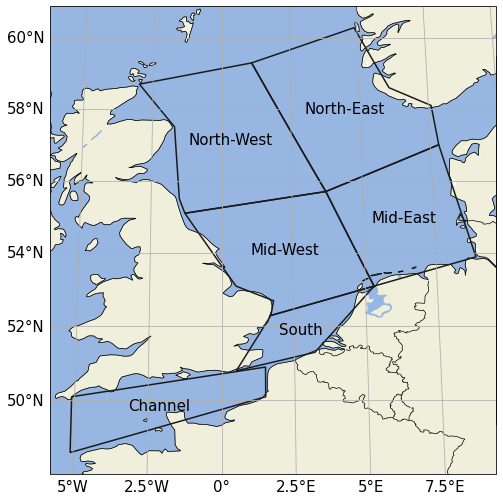

In [2]:
figs.timmerman_regions_plot(period=period)

#### Import and plot cmip6 sea level data (zos) historical

In [3]:
# Open data file
zos = imprt.import_cmip6_slh_data()

#### Import and plot nearby wind data

In [4]:
wind_data = imprt.import_cmip6_wind_data(model = model, data_type = data_type)

In [5]:
# Select period from 1950 - 2014
zos = zos.where(zos.time >= 1950, drop=True)
wind_data = wind_data.where(zos.time >= 1950, drop=True)


### Plot data

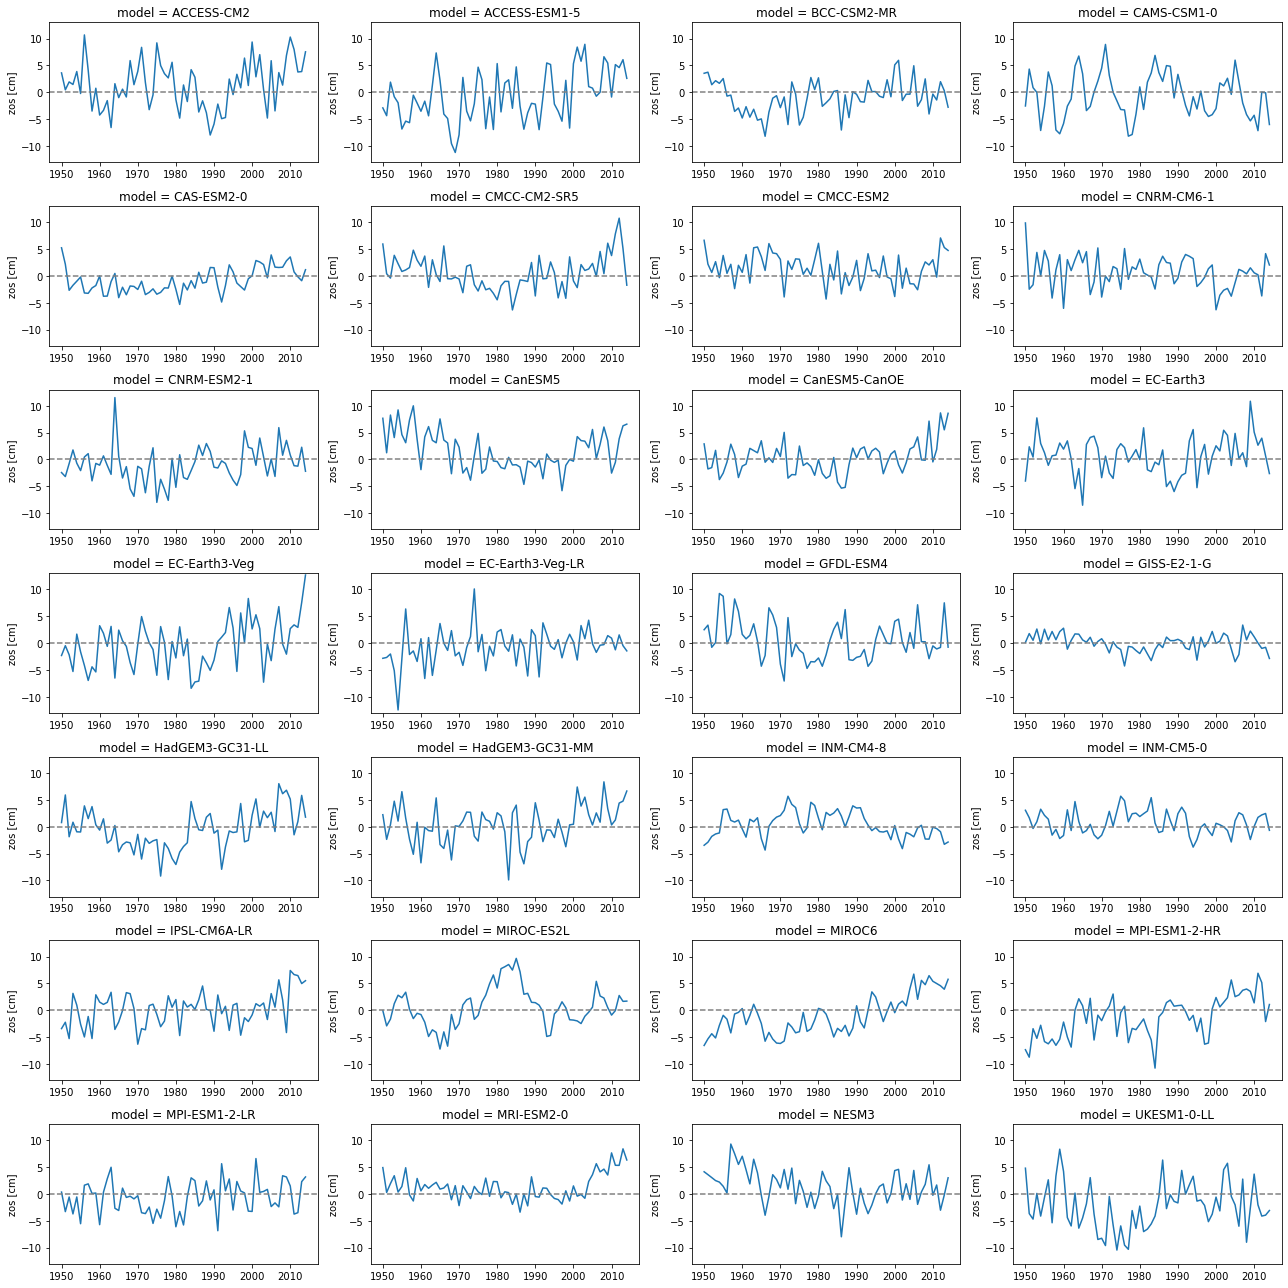

In [6]:
figs.plot_zos_data_per_model(zos, data_type, period = period)

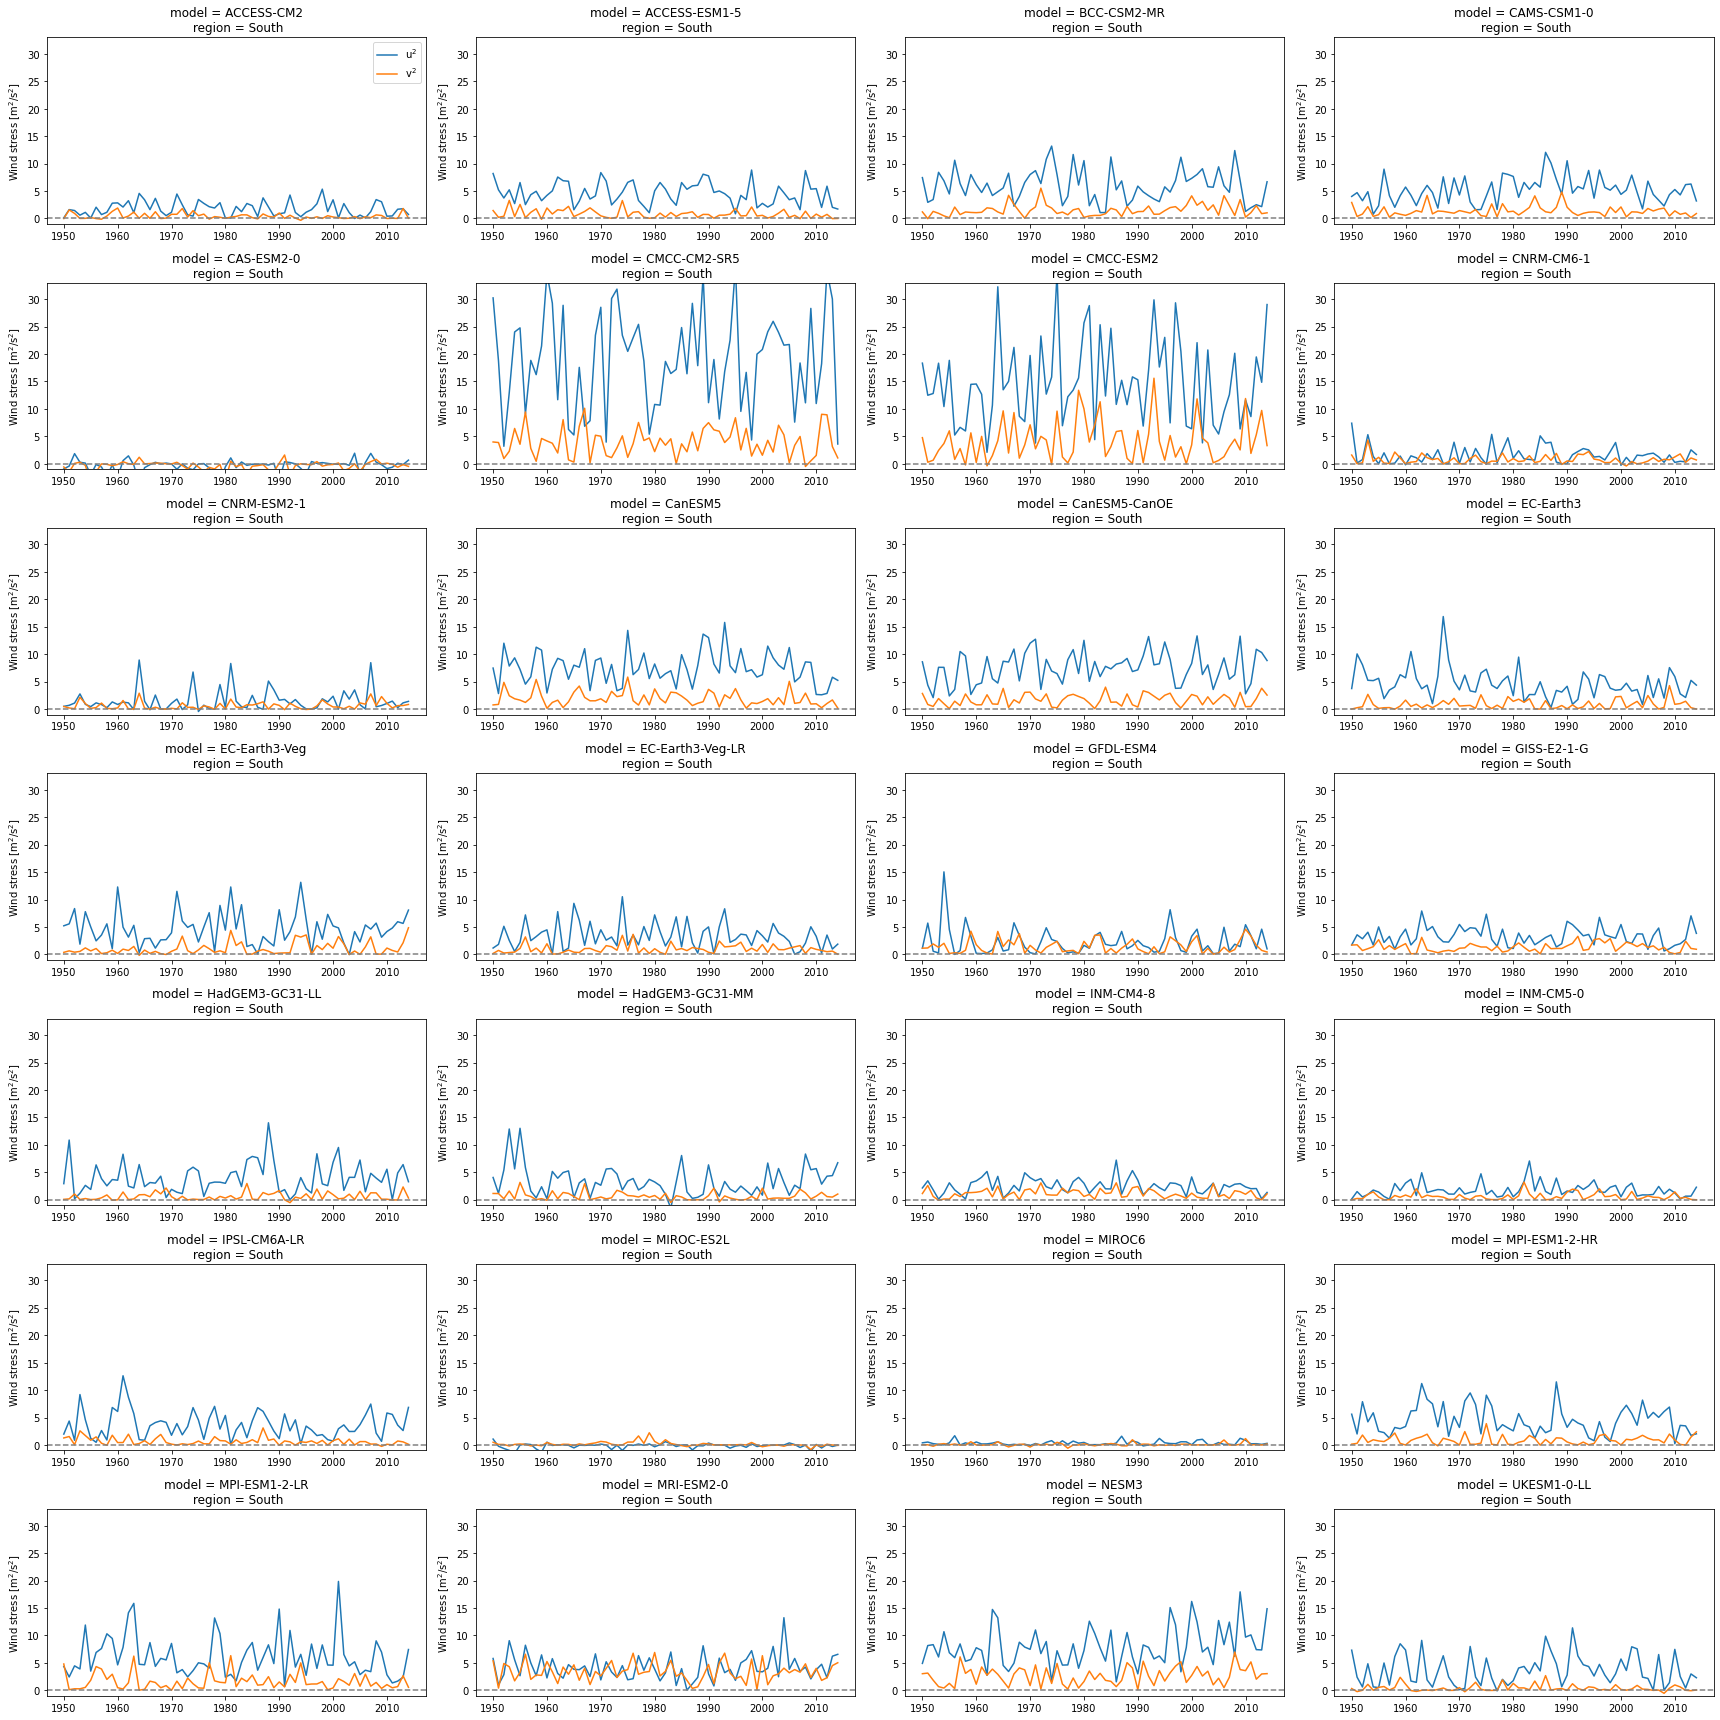

In [7]:
figs.plot_cmip6_wind_data_per_model(wind_data, model, data_type, period = period)

### Perform regression

In [8]:
results, timeseries, significance = regres.regression_cmip6(wind_data, zos, wind_model = model, data_type = data_type)

In [9]:
results.sel(station='Average').to_dataframe().drop('station', axis=1)

,r2,r2_wind,r2_u2,r2_v2,rmse,constant,channel_u2,channel_v2,south_u2,south_v2,midwest_u2,midwest_v2,mideast_u2,mideast_v2,northwest_u2,northwest_v2,northeast_u2,northeast_v2,trend
model,,,,,,,,,,,,,,,,,,,
ACCESS-CM2,0.588021,0.593475,0.477348,0.186567,2.508102,1.618387,-0.000000,-0.499575,-0.169118,-0.000000,-0.000000,0.000000,-0.000000,-0.713974,0.000000,0.250969,2.200244,0.000000,-0.000000
ACCESS-ESM1-5,0.694142,0.692121,0.691128,0.000000,2.395056,-2.225526,-1.162513,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,3.537731,-0.040745,0.249862
BCC-CSM2-MR,0.487264,0.463260,0.202006,0.268910,2.285219,-2.297702,-0.034552,-0.000000,-0.000000,-0.181981,0.000000,-0.000000,0.000000,-1.040114,0.000000,0.000000,1.268869,-0.000000,-0.563167
CAMS-CSM1-0,0.349136,0.394415,0.118971,0.188080,3.580054,-0.565558,0.000000,2.300568,0.000000,-0.000000,0.000000,0.000000,0.000000,-2.823054,1.226702,1.093765,0.822832,0.000000,-0.000000
CAS-ESM2-0,0.672861,0.418316,0.348889,0.180386,1.087873,-3.525881,0.021608,-0.138957,0.000000,-0.000000,0.000000,0.000000,-0.859649,0.000000,0.000000,-0.000000,-0.401724,0.253878,-1.636224
CMCC-CM2-SR5,0.680272,0.286034,0.223275,0.000000,1.499933,-2.100067,0.000000,0.000000,0.179830,-0.000000,0.309218,0.000000,0.407269,-0.000000,0.431246,0.000000,0.000000,0.400147,-2.993805
CMCC-ESM2,0.733336,0.743565,0.392943,0.455358,1.255505,2.418336,0.000000,0.488447,0.782827,0.000000,0.024961,0.064576,0.029213,0.000000,0.578115,1.619113,0.000000,-1.346377,0.000000
CNRM-CM6-1,0.760073,0.766127,0.454386,0.271531,1.658400,1.008223,0.000000,1.492022,0.000000,0.000000,0.000000,0.000000,0.678949,-0.000000,1.221420,0.000000,0.104735,0.000000,-0.000000
CNRM-ESM2-1,0.890183,0.785743,0.683813,0.546756,1.205052,-3.178534,1.142254,1.508995,0.330230,0.000000,0.000000,-0.000000,1.059576,-0.000000,0.000000,-0.000000,0.000000,-0.463412,-2.174395


In [10]:
significance.sel(station='Average').to_dataframe().drop('station', axis=1)

,Channel u$^2$,Channel v$^2$,South u$^2$,South v$^2$,Mid-West u$^2$,Mid-West v$^2$,Mid-East u$^2$,Mid-East v$^2$,North-West u$^2$,North-West v$^2$,North-East u$^2$,North-East v$^2$,trend,total,wind total
model,,,,,,,,,,,,,,,
ACCESS-CM2,False,False,False,False,True,False,True,True,True,False,True,False,False,True,True
ACCESS-ESM1-5,False,False,False,False,True,False,True,False,True,False,True,False,False,True,True
BCC-CSM2-MR,False,True,False,True,False,True,True,True,True,False,True,True,False,True,True
CAMS-CSM1-0,False,False,False,False,False,False,True,False,False,False,True,False,False,True,True
CAS-ESM2-0,False,False,True,False,True,False,True,False,False,False,True,True,True,True,True
CMCC-CM2-SR5,True,False,True,False,True,False,True,False,True,False,False,False,True,True,True
CMCC-ESM2,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True
CNRM-CM6-1,True,True,True,True,True,True,True,True,True,False,True,False,False,True,True
CNRM-ESM2-1,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True


#### Plot regression results

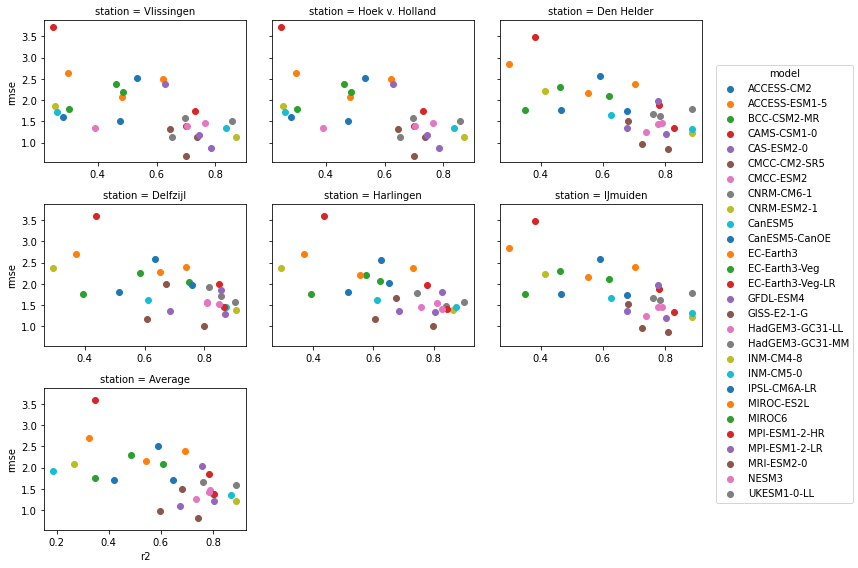

In [11]:
figs.plot_cmip6_two_variables(results, 'r2', 'rmse', data_type, period = period)

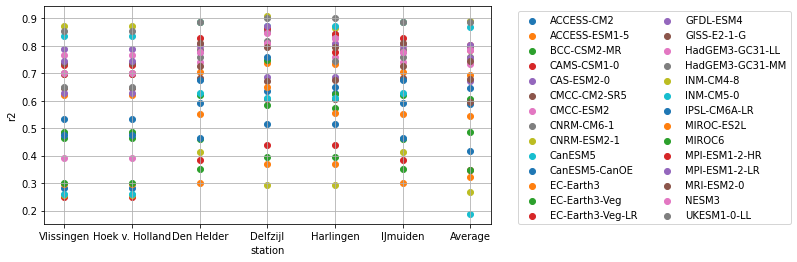

In [12]:
figs.plot_cmip6_result_per_station(results, 'r2', data_type, period = period)

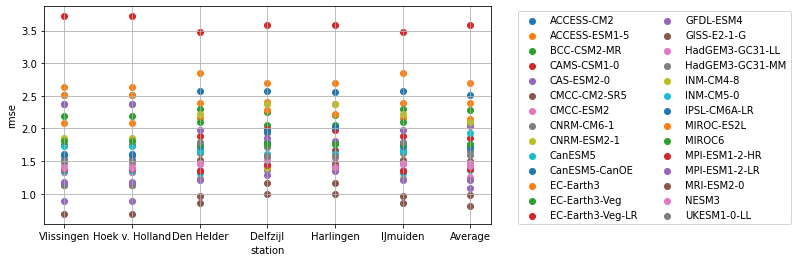

In [13]:
figs.plot_cmip6_result_per_station(results, 'rmse', data_type, period = period)

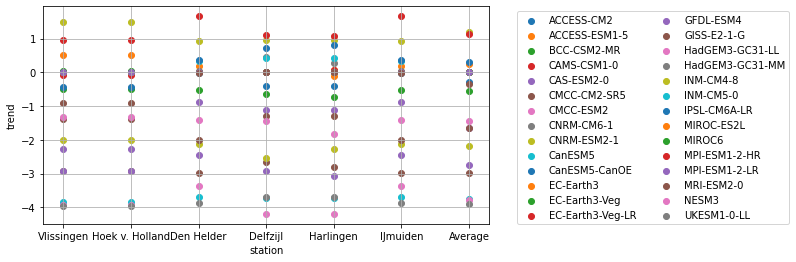

In [14]:
figs.plot_cmip6_result_per_station(results, 'trend', data_type, period = period)

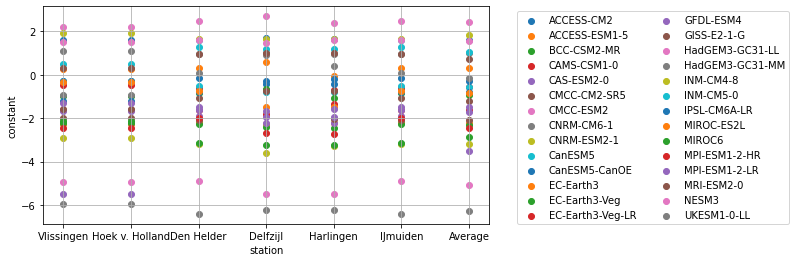

In [15]:
figs.plot_cmip6_result_per_station(results, 'constant', data_type, period = period)

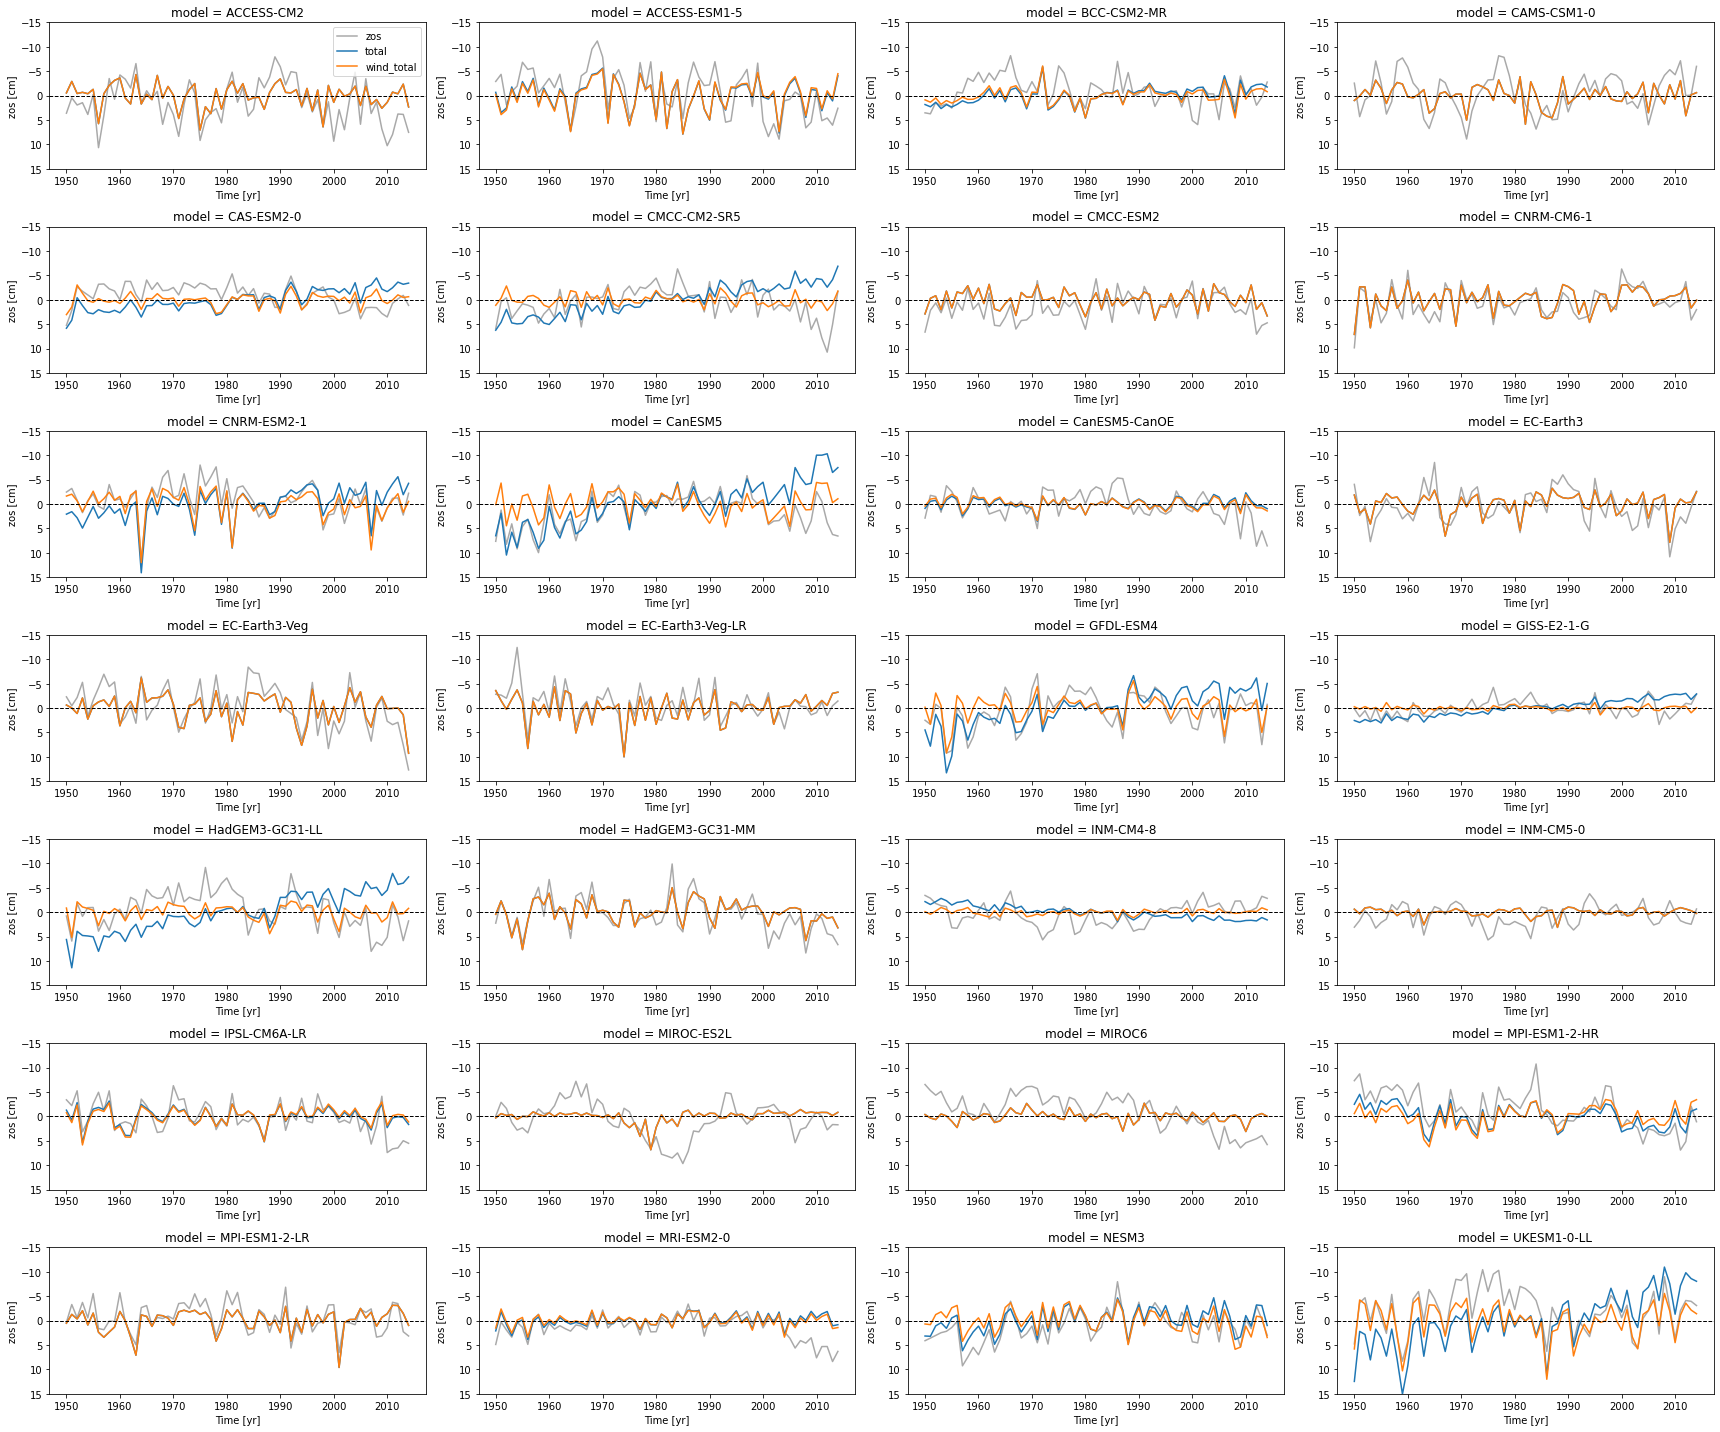

In [16]:
labels = ['total', 'wind_total']

figs.plot_zos_regression_result_per_model_one_station(zos, timeseries, labels, model, period = period)

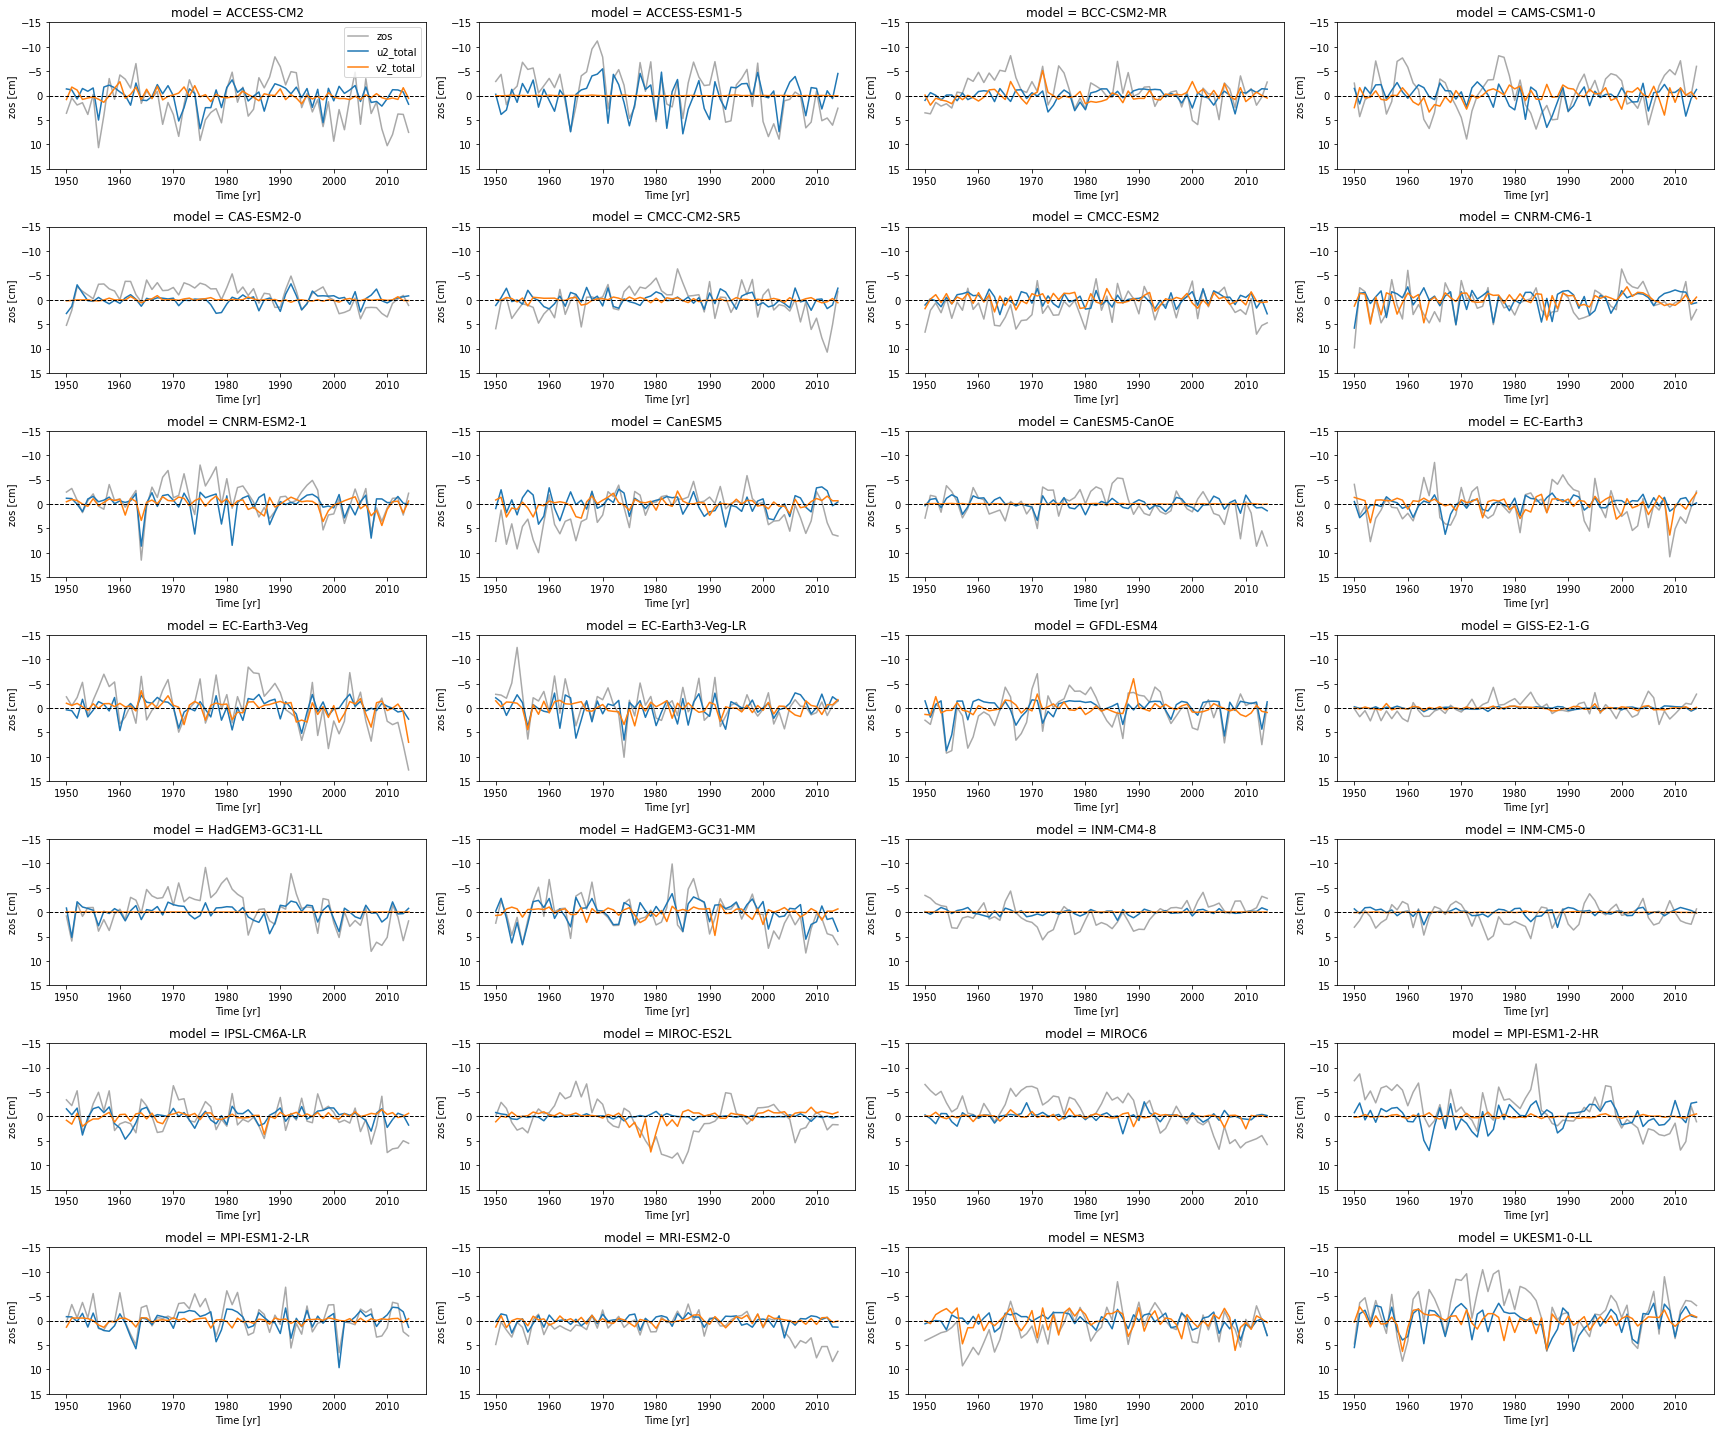

In [17]:
labels = ['u2_total', 'v2_total']

figs.plot_zos_regression_result_per_model_one_station(zos, timeseries, labels, model, period = period)

#### Plot trends

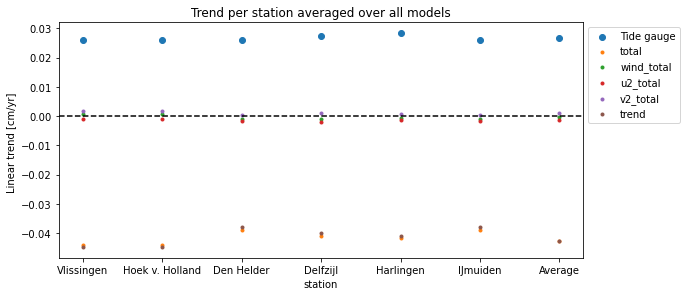

In [18]:
figs.plot_cmip6_trends_timeseries_per_station_model_averages(zos, timeseries, ['total', 'wind_total', 'u2_total', 'v2_total', 'trend'], 
                                                             model, data_type, errorbar = False, period = period)

### Obtain trends

In [19]:
from scipy.stats import linregress
import pandas as pd
import numpy as np

df = pd.DataFrame({'variable': ['trend', 'se']})
df = df.set_index('variable')

for model in timeseries.model.values:
    trend = linregress(timeseries.time, timeseries.wind_total.sel(station = 'Average', model = model).values).slope*10
    se = linregress(timeseries.time, timeseries.wind_total.sel(station = 'Average', model = model).values).stderr*10
    df[model] = [trend, se]

    
dfT = df.T

df['Average'] = [dfT.mean()['trend'], dfT.mean()['se']]

df.T

variable,trend,se
ACCESS-CM2,0.157916,0.160117
ACCESS-ESM1-5,-0.123411,0.222599
BCC-CSM2-MR,-0.150651,0.109837
CAMS-CSM1-0,0.081853,0.146286
CAS-ESM2-0,-0.084050,0.084062
CMCC-CM2-SR5,0.084024,0.078753
CMCC-ESM2,0.065975,0.121904
CNRM-CM6-1,-0.192442,0.161638
CNRM-ESM2-1,0.274907,0.197296
CanESM5,-0.067925,0.165770


In [20]:
best_models = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CAMS-CSM1-0', 'CanESM5', 
               'CanESM5-CanOE', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 
               'EC-Earth3-Veg-LR', 'GFDL-ESM4', 'MIROC-ES2L', 
                'MPI-ESM1-2-HR', 'NESM3']

In [21]:
df = pd.DataFrame({'variable': ['trend', 'se']})
df = df.set_index('variable')

for model in timeseries.where(timeseries.model.isin(best_models), drop = True).model.values:
    trend = linregress(timeseries.time, timeseries.wind_total.sel(station = 'Average', model = model).values).slope*10
    se = linregress(timeseries.time, timeseries.wind_total.sel(station = 'Average', model = model).values).stderr*10
    df[model] = [trend, se]

    
dfT = df.T

df['Average'] = [dfT.mean()['trend'], dfT.mean()['se']]

df.T

variable,trend,se
ACCESS-CM2,0.157916,0.160117
ACCESS-ESM1-5,-0.123411,0.222599
BCC-CSM2-MR,-0.150651,0.109837
CAMS-CSM1-0,0.081853,0.146286
CMCC-CM2-SR5,0.084024,0.078753
CMCC-ESM2,0.065975,0.121904
CNRM-CM6-1,-0.192442,0.161638
CanESM5,-0.067925,0.165770
CanESM5-CanOE,0.114439,0.073361
EC-Earth3-Veg-LR,-0.125190,0.182003


In [22]:
from scipy.stats import linregress
import pandas as pd
import numpy as np

df_trends = pd.DataFrame({'model': timeseries.model.values, 'trend':'', 'se':''})
df_trends = df_trends.set_index('model')

for model in timeseries.model.values:
    df_trends['trend'][model] = linregress(timeseries.time.values, timeseries.wind_total.sel(station = 'Average', model = model)).slope*10
    df_trends['se'][model] = linregress(timeseries.time.values, timeseries.wind_total.sel(station = 'Average', model = model)).stderr*10

df_trends

,trend,se
model,,
ACCESS-CM2,0.157916,0.160117
ACCESS-ESM1-5,-0.123411,0.222599
BCC-CSM2-MR,-0.150651,0.109837
CAMS-CSM1-0,0.081853,0.146286
CAS-ESM2-0,-0.08405,0.084062
CMCC-CM2-SR5,0.084024,0.078753
CMCC-ESM2,0.065975,0.121904
CNRM-CM6-1,-0.192442,0.161638
CNRM-ESM2-1,0.274907,0.197296


In [23]:
df_trends.max()

trend    0.283593
se       0.241528
dtype: object

In [26]:
df_trends.min()

trend   -0.192442
se       0.031995
dtype: object

In [25]:
df_trends.mean()

trend   -0.002432
se       0.130708
dtype: float64

In [24]:
df_trends.std()

trend    0.136438
se       0.054721
dtype: float64